<a href="https://colab.research.google.com/github/andreac941/ComputerVision-Eq3/blob/main/9.4_Segmentation_Otsu_Eq10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **9.4 Google Colab con algoritmo OTSU**

**Equipo 10:**

* Carlos Roberto Torres Ferguson A01215432
* Andrea Carolina Treviño Garza A01034993
* Julio Adrián Quintana Gracia A01793661
* Pablo Alejandro Colunga Vázquez A01793671

# **Otsu Thresholding**

## Table of Contents
1. [Libraries](#libraries)
2. [Single Thresholding](#single)
3. [Multi Thresholding](#multi)

Thresholding is used to create a binary image from a grayscale image

## **Importing Libraries** <a class="anchor" id="libraries" ></a>

In [127]:
import matplotlib.pyplot as plt
from skimage import data, io
from skimage.filters import threshold_otsu
from skimage.filters import threshold_multiotsu
import numpy as np

## **Single Thresholding** <a class="anchor" id="single" ></a>

We illustrate how to apply one of these thresholding algorithms.
Otsu's method [2] calculates an "optimal" threshold (marked by a red line in the
histogram below) by maximizing the variance between two classes of pixels,
which are separated by the threshold. Equivalently, this threshold minimizes
the intra-class variance.

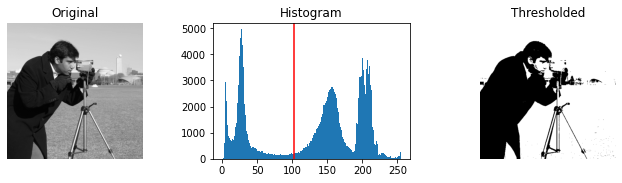

In [128]:
#Código original
image = data.camera()
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(ncols=3, figsize=(12, 2.5))
ax = axes.ravel()
ax[0] = plt.subplot(1, 3, 1)
ax[1] = plt.subplot(1, 3, 2)
ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram')
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded')
ax[2].axis('off')

plt.show()

If you are not familiar with the details of the different algorithms and the
underlying assumptions, it is often difficult to know which algorithm will give
the best results. Therefore, Scikit-image includes a function to evaluate
thresholding algorithms provided by the library. At a glance, you can select
the best algorithm for your data without a deep understanding of their
mechanisms.




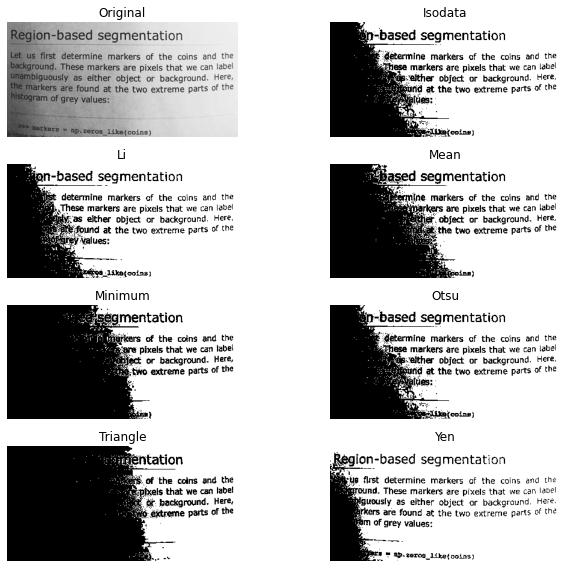

In [129]:
from skimage.filters import try_all_threshold

img = data.page()

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()

# **Ejercicio**
* Experimenta con diferentes imágenes, además de las provistas en en Colab. Identifica imágenes con diferentes backgrounds y estilos, ¿cuáles son las limitaciones de single thresholding contra el algoritmo de Otsu?

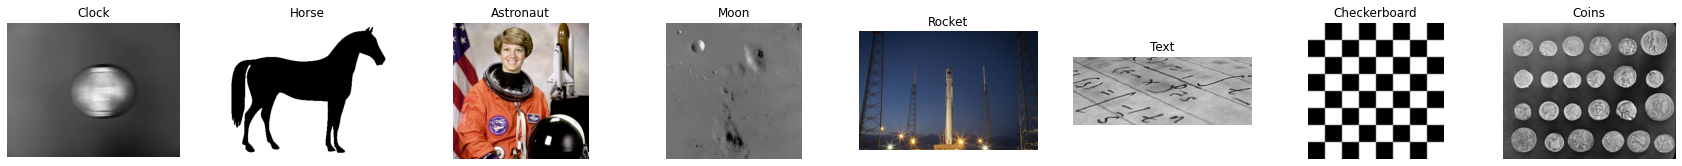

In [130]:
img1 = data.clock()
img2 = data.horse() 
img3 = data.astronaut() 
img4 = data.moon()
img5 = data.rocket() 
img6 = data.text() 
img7 = data.checkerboard() 
img8 = data.coins() 

listIMG = [img1, img2, img3, img4, img5, img6, img7, img8]
listTIT = ["Clock", "Horse", "Astronaut", "Moon", "Rocket", "Text", "Checkerboard", "Coins"]
fig, axes = plt.subplots(ncols=8, figsize=(30, 2.5))
ax = axes.ravel()

for y in range(0,7):
  ax[y] = plt.subplot(1, 8, y+1)
ax[7] = plt.subplot(1, 8, 8, sharex=ax[0], sharey=ax[0])

for i in range(0,8):
  ax[i].imshow(listIMG[i], cmap=plt.cm.gray)
  ax[i].set_title(listTIT[i])
  ax[i].axis('off')
plt.show()

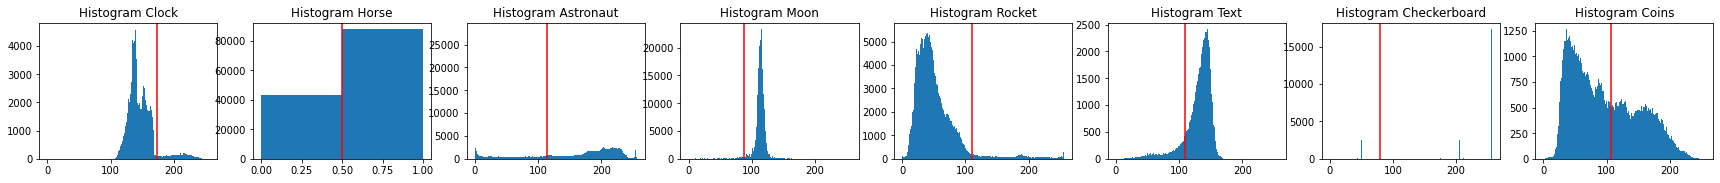

In [131]:
img3 = img3[:,:,0]
img5 = img5[:,:,0]
img2 = img2.astype(int)

list1 = [img1.ravel(), img2.ravel(), img3.ravel(), img4.ravel(), img5.ravel(), img6.ravel(), img7.ravel(), img8.ravel()]
fig, axes = plt.subplots(1,8, figsize=(30, 2.5))
ax = axes.ravel()
for i, ax1 in enumerate(ax):
  if i == 1:
    ax1.hist(list1[i], bins=2, range = [0,1])
    ax1.set_title('Histogram '+str(listTIT[i]))
    thresh = 0.5
    ax1.axvline(thresh, color='r')
  else:
    ax1.hist(list1[i], bins=256, range = [0,256])
    ax1.set_title('Histogram '+str(listTIT[i])) 
    thresh = threshold_otsu(list1[i])
    ax1.axvline(thresh, color='r')
plt.show()

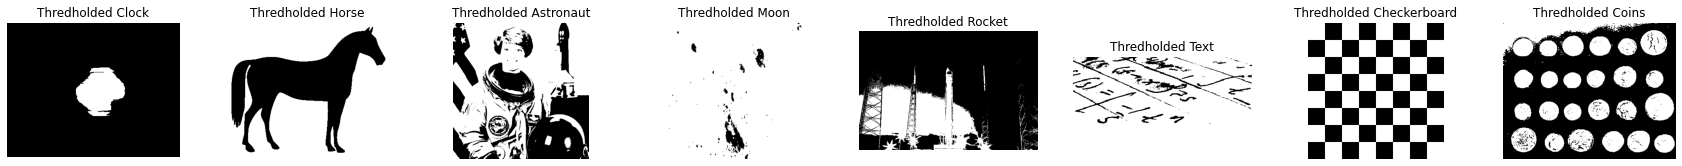

In [132]:
img1 = data.clock()
img2 = data.horse() 
img3 = data.astronaut() 
img4 = data.moon()
img5 = data.rocket() 
img6 = data.text() 
img7 = data.checkerboard() 
img8 = data.coins() 

from skimage.color import rgb2gray
gray3 = rgb2gray(img3)
gray5 = rgb2gray(img5)
img2 = img2.astype(int)

listGray = [img1, img2, gray3, img4, gray5, img6, img7, img8]
fig, axes = plt.subplots(ncols=8, figsize=(30, 2.5))
ax = axes.ravel()

for y in range(0,7):
  ax[y] = plt.subplot(1, 8, y+1)
ax[7] = plt.subplot(1, 8, 8, sharex=ax[0], sharey=ax[0])

for i in range(0,8):
  thresh = threshold_otsu(listGray[i])
  binary = listGray[i] > thresh
  ax[i].imshow(binary, cmap=plt.cm.gray)
  ax[i].set_title('Thredholded '+str(listTIT[i])) 
  ax[i].axis('off')
plt.show()

Intentamos Single Thresholding de la base de imágenes "data" de skimage con las siguientes imágenes. De cada uno concluimos:
* data.clock() - Sin buenos resultados para Single Thresholding.
* data.horse() - Buenos resultados para Single Thresholding porque ya es binaria.
* data.astronaut() - Sin buenos resultados para Single Thresholding.
* data.moon() - Sin buenos resultados para Single Thresholding.
* data.rocket() - Sin buenos resultados para Single Thresholding.
* data.text() - Buenos resultados para Single Thresholding porque ya es binaria.
* data.checkerboard() - Buenos resultados para Single Thresholding porque ya es binaria.
* data.coins() - Buenos resultados para Single Thresholding.

##**Conclusiones**
* Observamos que el single thresholding (binario), no resulta muy útil con imágenes que no han tenido algún pre-procesamiento. 
* Algunos requerimientos que observamos esenciales para que funcione son:
  * Utilizar imágenes en escala de grises.
  * Remover el ruido, por ejemplo con filtros gausseanos u operaciones morfológicas (para limpiar las imágenes.
  * Una imagen muy detallada (muchas tonalidades de grises) difilcilmente obtendrá buenos resultados, es decir, identificar correctamente las 2 entidades principales de búsqueda: el objeto principal y el fondo
  * Una vez que define un umbral, si se encuentran pixeles por debajo de se umbral se define como 0 y si son mayores se establecen como 1, es por eso que cuando tenemos un objeto principal en imagenes no consolidadas en el background (fondo) estas imagenes se consideran como parte del obejto principal.





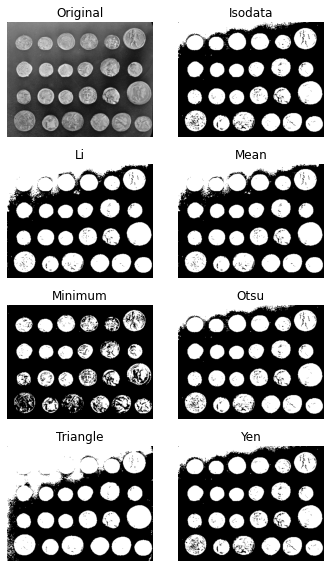

In [133]:
fig, ax = try_all_threshold(img8, figsize=(5, 8), verbose=False)
plt.show()

Analizando cuáles métodos de Single Thresholding dan mejores resultados para cada imagen:
* img1 - Todos los single thresholdings dan resultados similares a Otsu, ninguno notoriamente superiores.
* img2 - Otse y Mean dan los mejores resultados.
* img3 - Yen y Mean dan los mejores resultados.
* img4 - Ninguno de los single thresholdings da buenos resultados con esta imagen.
* img5 - Se observan buenos resultados con casi todos menos Li, Mean y Triangle.
* img6 - Se observan buenos resultados con casi todos menos Mean y Minimum.
* img7 - Se observan buenos resultados con casi todos menos Minimum y Triangle.
* img8 - Mejores resultados con Otsu y Minimum.


En conclusión el mejor Single Thresholding va a depender de la imagen y el uso que se le quiera dar, es decir, de qué se quiera identificar del fondo. En ocasiones incluso seleccionar un valor de thresholding de manera manual va a arrojar mejores resultados.

In [134]:
# TODO: Slide image for segmentation, alpha blerding

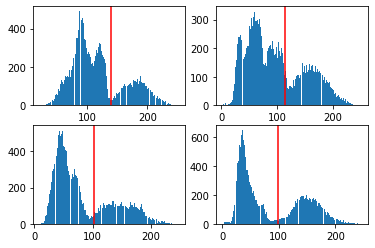

In [154]:
image2 = data.coins()
nrows, ncols = image2.shape
rsplit, csplit = nrows // 2, ncols // 2

quadrants = [
    image2[:rsplit, :csplit],
    image2[:rsplit, csplit:],
    image2[rsplit:, :csplit],
    image2[rsplit:, csplit:],
]

fig, axes = plt.subplots(2, 2)

for quadrant, ax in zip(quadrants, axes.flat):
    ax.hist(quadrant.ravel(), bins=255) 
    thresh = threshold_otsu(quadrant)
    ax.axvline(thresh, color='r')
    #ax.set_axis_off()
plt.show()

* Aquí se observa que el umbral para cada sección está mejor definido y las regiones de diferentes intensidades de pixeles están mejore divididas.

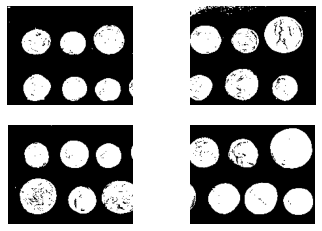

In [155]:
fig, axes = plt.subplots(2, 2)

for quadrant, ax in zip(quadrants, axes.flat):
    thresh = threshold_otsu(quadrant)
    binary = quadrant > thresh
    ax.imshow(binary, cmap=plt.cm.gray) 
    ax.set_axis_off()
plt.show()

* Aquí podemos observar que si dividimos la imagen de las monedas en 4 secciones sí obtenemos mejores resultados para diferenciarlas del fondo, utilizando el Single Thresholding en cada una de las secciones por separado. Esto sucede porque al dividir la imagen reducimos la variación total de tonalidades de grises de toda la imagen. De manera que trabajamos en secciones más pequeñas que tienen pixeles más parececidos entre sí, permitiendo dividir mejor el fondo de los objetos principales (lo que se aprecia con mucha claridad en sus histogramas).

## **Multi Thresholding** <a class="anchor" id="multi" ></a>

The multi-Otsu threshold  is a thresholding algorithm that is used to separate
the pixels of an input image into several different classes, each one obtained
according to the intensity of the gray levels within the image.

Multi-Otsu calculates several thresholds, determined by the number of desired
classes. The default number of classes is 3: for obtaining three classes, the
algorithm returns two threshold values. They are represented by a red line in
the histogram below.

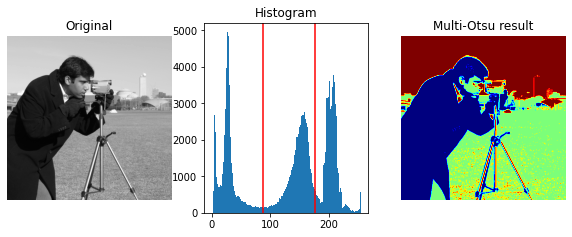

In [135]:
# The input image.
image = data.camera()

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

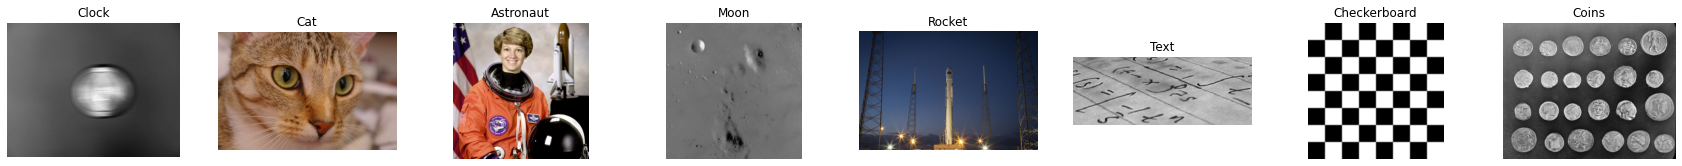

In [136]:
img1 = data.clock()
img2 = data.cat() # Se cambia imagen porque imagen binaria de caballo no permite más de un Threshold
img3 = data.astronaut() 
img4 = data.moon()
img5 = data.rocket() 
img6 = data.text() 
img7 = data.checkerboard() 
img8 = data.coins() 

listIMG = [img1, img2, img3, img4, img5, img6, img7, img8]
listTIT = ["Clock", "Cat", "Astronaut", "Moon", "Rocket", "Text", "Checkerboard", "Coins"]
fig, axes = plt.subplots(ncols=8, figsize=(30, 2.5))
ax = axes.ravel()

for y in range(0,7):
  ax[y] = plt.subplot(1, 8, y+1)
ax[7] = plt.subplot(1, 8, 8, sharex=ax[0], sharey=ax[0])

for i in range(0,8):
  ax[i].imshow(listIMG[i], cmap=plt.cm.gray)
  ax[i].set_title(listTIT[i])
  ax[i].axis('off')
plt.show()

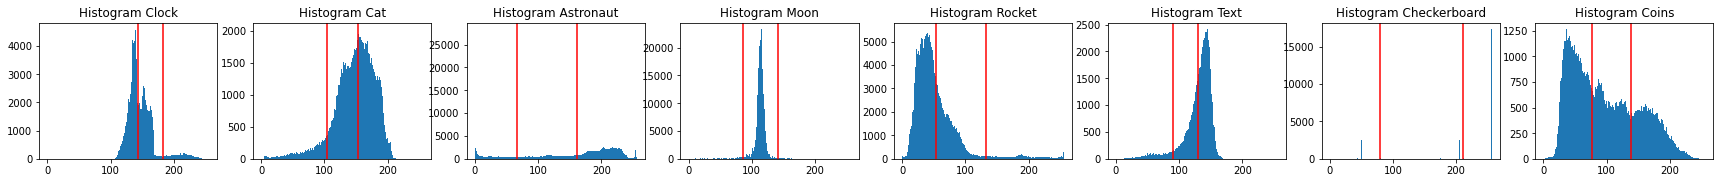

In [137]:
img2 = img2[:,:,0]
img3 = img3[:,:,0]
img5 = img5[:,:,0]

list1 = [img1.ravel(), img2.ravel(), img3.ravel(), img4.ravel(), img5.ravel(), img6.ravel(), img7.ravel(), img8.ravel()]
fig, axes = plt.subplots(1,8, figsize=(30, 2.5))
ax = axes.ravel()
for i, ax1 in enumerate(ax):
  ax1.hist(list1[i], bins=256, range = [0,256])
  ax1.set_title('Histogram '+str(listTIT[i])) 
  thresholds = threshold_multiotsu(list1[i])
  for thresh in thresholds:
    ax1.axvline(thresh, color='r')
plt.show()

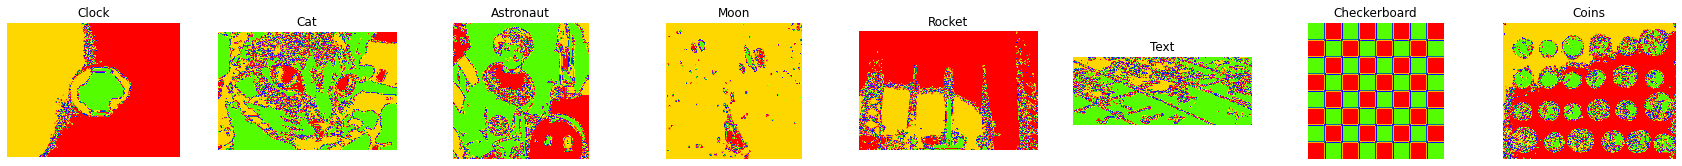

In [138]:
listIMG1 = [img1, img2, img3, img4, img5, img6, img7, img8]

fig, axes = plt.subplots(1,8, figsize=(30, 2.5))
ax = axes.ravel()

for y in range(0,7):
  ax[y] = plt.subplot(1, 8, y+1)
ax[7] = plt.subplot(1, 8, 8, sharex=ax[0], sharey=ax[0])

for i in range(0,8):
  thresholds = threshold_multiotsu(listIMG1[i])
  regions = np.digitize(listIMG1[i], bins=thresholds)
  ax[i].imshow(regions, cmap= 'prism')
  ax[i].set_title(listTIT[i])
  ax[i].axis('off')
plt.show()

# **Conclusiones:**
* Podemos observar que muchas de estas arrojan mejores resultados con más de un umbral (Threshold). Principalmente las imágenes a color que se convirtieron a escala de grises, en el sentido de que se distingue mejor la imagen en general pero en ningún caso (fuera del tablero de ajedrez) se están distinguiendo los objetos correctos con respecto al fondo (background).

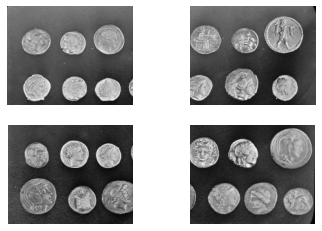

In [146]:
from skimage.util import view_as_blocks
from skimage import data
import matplotlib.pyplot as plt

image1 = data.coins()

nrows, ncols = image1.shape
rsplit, csplit = nrows // 2, ncols // 2

quadrants = [
    image1[:rsplit, :csplit],
    image1[:rsplit, csplit:],
    image1[rsplit:, :csplit],
    image1[rsplit:, csplit:],
]

fig, axes = plt.subplots(2, 2)

for quadrant, ax in zip(quadrants, axes.flat):
    ax.imshow(quadrant, cmap='gray')
    ax.set_axis_off()
plt.show()

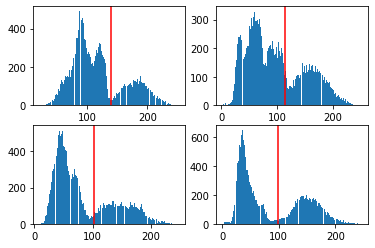

In [152]:
image2 = data.coins()
nrows, ncols = image2.shape
rsplit, csplit = nrows // 2, ncols // 2

quadrants = [
    image2[:rsplit, :csplit],
    image2[:rsplit, csplit:],
    image2[rsplit:, :csplit],
    image2[rsplit:, csplit:],
]

fig, axes = plt.subplots(2, 2)

for quadrant, ax in zip(quadrants, axes.flat):
    ax.hist(quadrant.ravel(), bins=255) 
    thresh = threshold_otsu(quadrant)
    ax.axvline(thresh, color='r')
    #ax.set_axis_off()
plt.show()

In [ ]:
image3 = data.coins()
nrows, ncols = image3.shape
rsplit, csplit = nrows // 2, ncols // 2

quadrants = [
    image3[:rsplit, :csplit],
    image3[:rsplit, csplit:],
    image3[rsplit:, :csplit],
    image3[rsplit:, csplit:],
]

fig, axes = plt.subplots(2, 2)

for quadrant, ax in zip(quadrants, axes.flat):
    ax.hist(quadrant.ravel(), bins=255) 
    thresholds = threshold_multiotsu(quadrant)
    for thresh in thresholds:
      ax.axvline(thresh, color='r')
    #ax.set_axis_off()
plt.show()

#**Bibliografía:**
* 